In [3]:
%pip install statsmodels



  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 461.8 kB/s eta 0:00:00
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.9 MB 10.2 MB/s eta 0:00:05
    --------------------------------------- 0.6/45.9 MB 7.6 MB/s eta 0:00:06
    --------------------------------------- 1.0/45.9 MB 7.9 MB/s eta 0:00:06
   - -------------------------------------- 1.2/45.9 MB 6.8 MB/s eta 0:00:07
   - --------------------------------------

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import pandas as pd

In [6]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [9]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [12]:
df_airline.dropna(axis=0,inplace=True)

In [13]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [14]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [15]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [16]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [17]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [20]:
df_airline.set_index('Month',inplace=True)

In [21]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

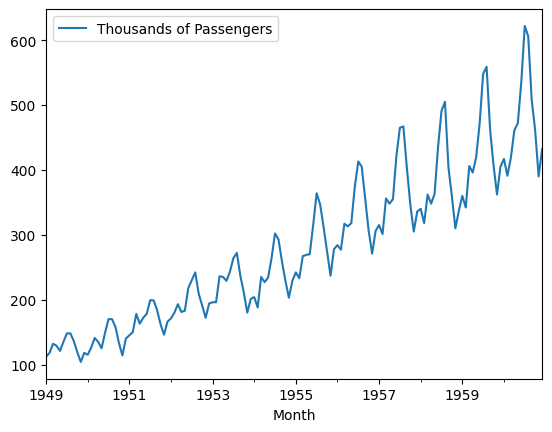

In [22]:
df_airline.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statiscs: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

        

In [28]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statiscs: 0.8153688792060463
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)


In [30]:
df_airline.head()


,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [31]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statiscs: -2.8292668241699923
p- value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [33]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statiscs: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [34]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [35]:

adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statiscs: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

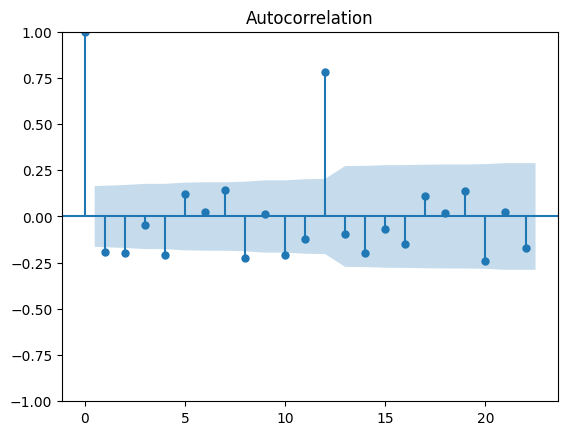

In [37]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

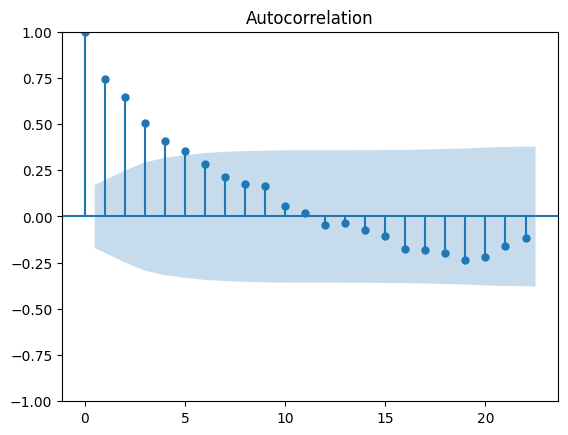

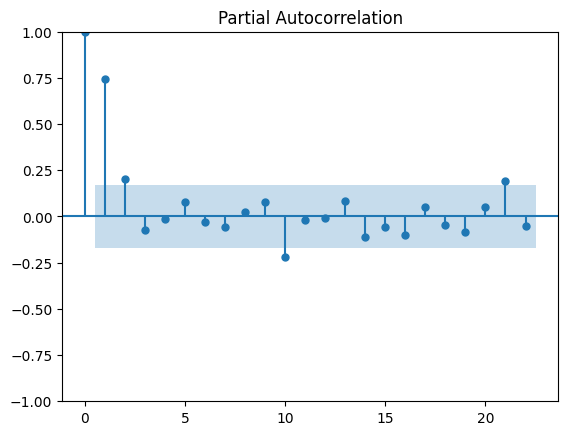

In [79]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

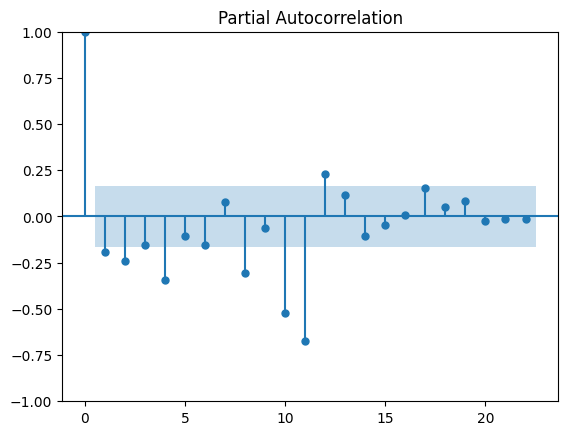

In [39]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

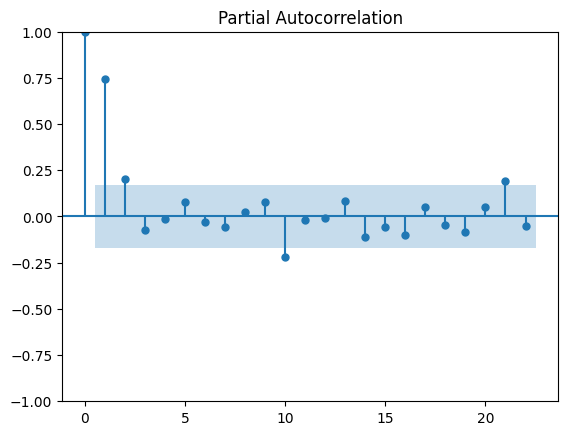

In [40]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [41]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [42]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [43]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]


In [44]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [45]:

test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [46]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [47]:

train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [92]:
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))


C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [93]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:

model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.734
Date:                     Mon, 03 Jun 2024   AIC                            661.468
Time:                             11:56:19   BIC                            716.822
Sample:                         01-01-1949   HQIC                           683.692
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.483      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.639      0.523      -0.183       0.361
ar.L4         -1.0258      0.131     -7.829      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9860      0.143     -6.881      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.027      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.092      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.058      0.000      -1.784      -0.787
ma.L2          1.2392      0.359      3.456      0.001       0.536       1.942
ma.L3         -1.4412      0.436     -3.303      0.001      -2.297      -0.586
ma.L4          1.3757      0.507      2.714      0.007       0.382       2.369
ma.L5         -1.2162      0.575     -2.117      0.034      -2.342      -0.090
ma.L6          1.0828      0.660      1.640      0.101      -0.211       2.377
ma.L7         -1.0699      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8858      0.819      1.082      0.279      -0.719       2.491
ma.L9         -0.7850      0.737     -1.066      0.287      -2.229       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.656       1.702
ma.L11        -0.4130      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2471     16.211      4.765      0.000      45.474     109.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [95]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [96]:

pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [97]:

pred

1956-01-01    283.247794
1956-02-01    269.515999
1956-03-01    295.184321
1956-04-01    298.589351
1956-05-01    299.103433
1956-06-01    345.358383
1956-07-01    388.485076
1956-08-01    371.887975
1956-09-01    340.083514
1956-10-01    302.900251
1956-11-01    271.804434
1956-12-01    302.627753
1957-01-01    311.081374
1957-02-01    293.803468
1957-03-01    316.959240
1957-04-01    324.516528
1957-05-01    326.106671
1957-06-01    372.704848
1957-07-01    414.554978
1957-08-01    396.549790
1957-09-01    365.288669
1957-10-01    332.226031
1957-11-01    302.508166
1957-12-01    329.456103
1958-01-01    338.544613
1958-02-01    318.391780
1958-03-01    338.945887
1958-04-01    350.517935
1958-05-01    353.236153
1958-06-01    399.577036
1958-07-01    440.488414
1958-08-01    421.292066
1958-09-01    390.662752
1958-10-01    361.580509
1958-11-01    333.167483
1958-12-01    356.288933
1959-01-01    365.691896
1959-02-01    343.251919
1959-03-01    361.176216
1959-04-01    376.553611


In [62]:

residuals

Month
1956-01-01     86.654767
1956-02-01     79.654767
1956-03-01    119.654767
1956-04-01    115.654767
1956-05-01    120.654767
1956-06-01    176.654767
1956-07-01    215.654767
1956-08-01    207.654767
1956-09-01    157.654767
1956-10-01    108.654767
1956-11-01     73.654767
1956-12-01    108.654767
1957-01-01    117.654767
1957-02-01    103.654767
1957-03-01    158.654767
1957-04-01    150.654767
1957-05-01    157.654767
1957-06-01    224.654767
1957-07-01    267.654767
1957-08-01    269.654767
1957-09-01    206.654767
1957-10-01    149.654767
1957-11-01    107.654767
1957-12-01    138.654767
1958-01-01    142.654767
1958-02-01    120.654767
1958-03-01    164.654767
1958-04-01    150.654767
1958-05-01    165.654767
1958-06-01    237.654767
1958-07-01    293.654767
1958-08-01    307.654767
1958-09-01    206.654767
1958-10-01    161.654767
1958-11-01    112.654767
1958-12-01    139.654767
1959-01-01    162.654767
1959-02-01    144.654767
1959-03-01    208.654767
1959-04-01    198.6

<Axes: ylabel='Density'>

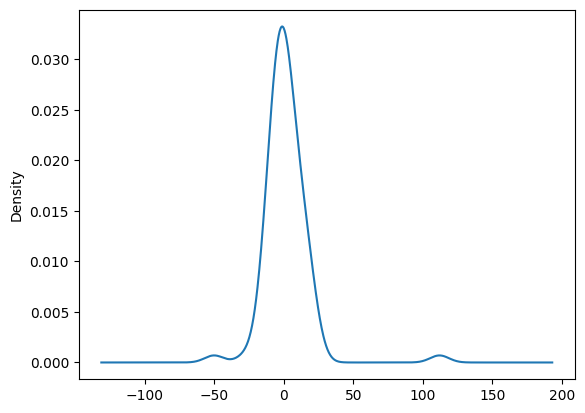

In [98]:

model_Arima_fit.resid.plot(kind='kde')

In [99]:

test_data['Predicted_ARIMA']=pred

C:\Users\ACER\AppData\Local\Temp\ipykernel_20036\155730148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

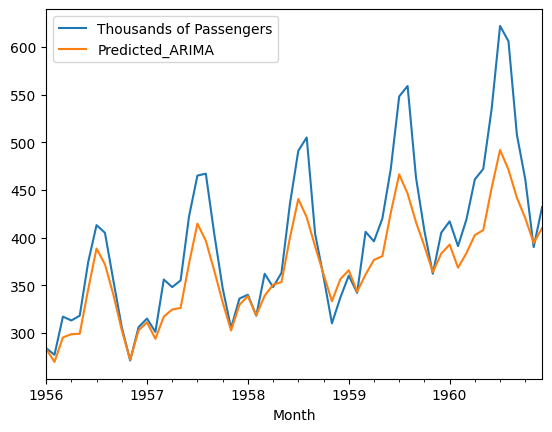

In [100]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

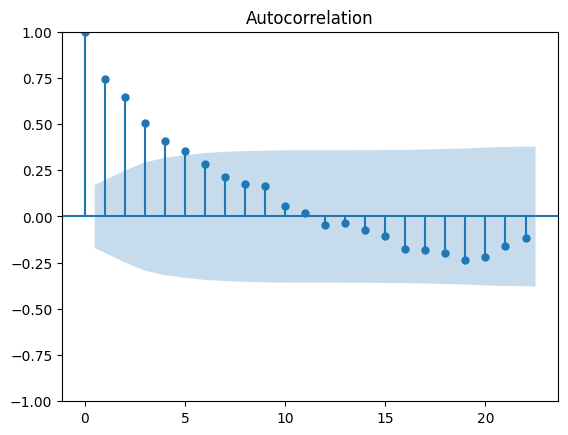

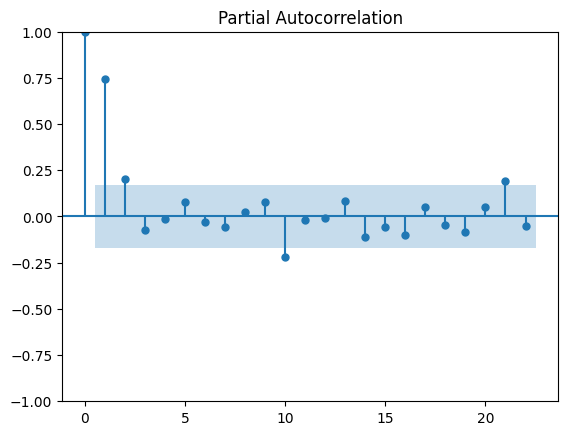

In [66]:

acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [67]:

## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [68]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:

model_SARIMA_fit=model_SARIMA.fit()

C:\Users\ACER\OneDrive\Documents\pandas jupyter\pandas_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Mon, 03 Jun 2024   AIC                            548.481
Time:                                     11:02:30   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.938      0.638      0.523      -1.240       2.438
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4532      0.894     -0.507      0.612      -2.206       1.300
ma.L1          0.1832      1.166      0.157      0.875      -2.101       2.468
ma.L2         -0.5348      1.264     -0.423      0.672      -3.011       1.942
ma.L3         -0.0986      0.385     -0.256      0.798      -0.852       0.655
ma.L4         -0.1272      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.692      0.489      -0.452       0.947
sigma2        87.7265     81.225      1.080      0.280     -71.473     246.926
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:

test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,197.345233
1960-09-01,508.0,-98.0,-82.0,45.0,197.345233
1960-10-01,461.0,-47.0,51.0,54.0,197.345233
1960-11-01,390.0,-71.0,-24.0,28.0,197.345233
1960-12-01,432.0,42.0,113.0,27.0,197.345233


In [72]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [73]:

pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

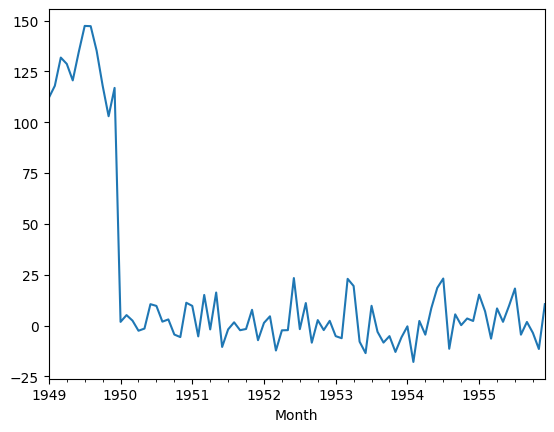

In [74]:

model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

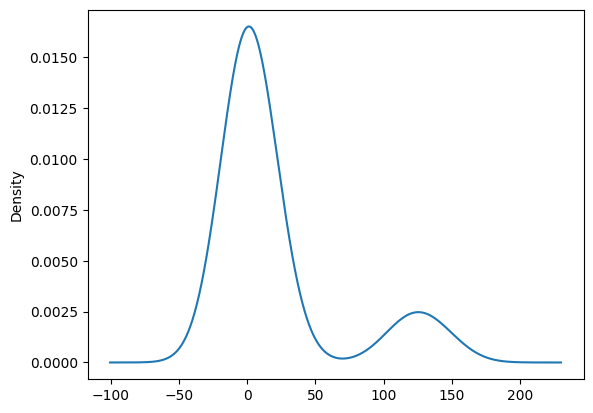

In [75]:

model_SARIMA_fit.resid.plot(kind='kde')

In [76]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\ACER\AppData\Local\Temp\ipykernel_20036\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [77]:

test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,197.345233,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,197.345233,NaN
1956-03-01,317.0,40.0,47.0,50.0,197.345233,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,197.345233,NaN
1956-05-01,318.0,5.0,9.0,48.0,197.345233,NaN
1956-06-01,374.0,56.0,51.0,59.0,197.345233,NaN
1956-07-01,413.0,39.0,-17.0,49.0,197.345233,403.399007
1956-08-01,405.0,-8.0,-47.0,58.0,197.345233,385.072694
1956-09-01,355.0,-50.0,-42.0,43.0,197.345233,349.446099


<Axes: xlabel='Month'>

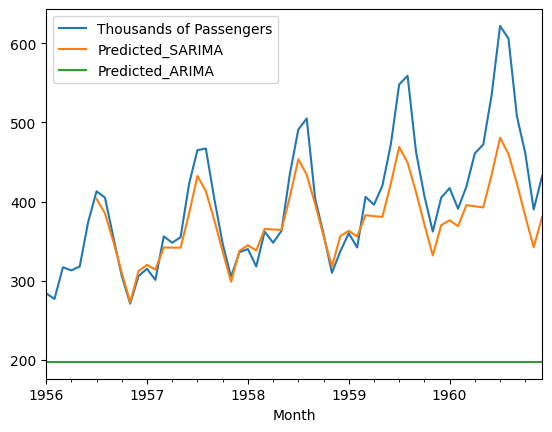

In [78]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()